In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
name = '2018-10-07T11:30:45_436.4MHz'
#name = '2018-11-01T07:58:34_436.4MHz'
#name = '2018-11-09T11:53:15_435.4MHz'
doppler = xr.open_dataset(f'output/{name}_doppler.nc')
spectrum = xr.open_dataset(f'output/{name}_spectrum.nc')
power = xr.open_dataset(f'output/{name}_power.nc')

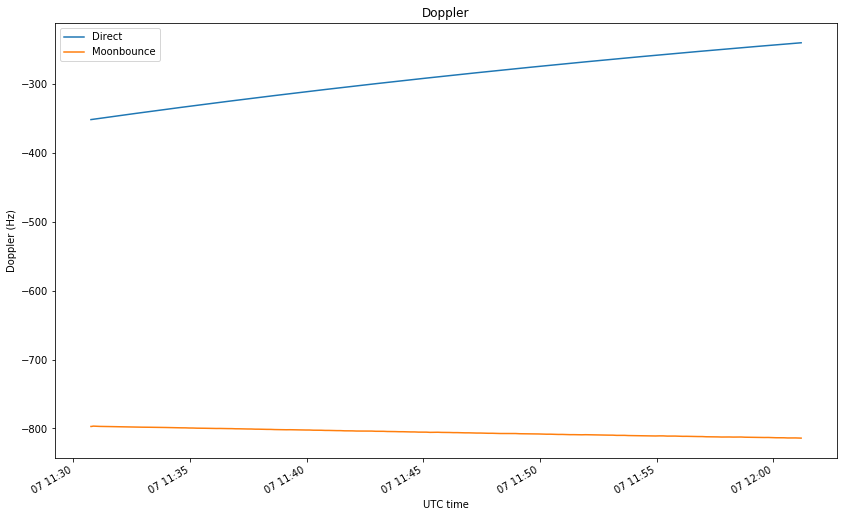

In [3]:
plt.figure(figsize=(14,8),facecolor='w')
doppler['doppler_direct'].plot()
doppler['doppler_moonbounce'].plot()
plt.title('Doppler')
plt.xlabel('UTC time')
plt.ylabel('Doppler (Hz)')
plt.legend(['Direct', 'Moonbounce']);

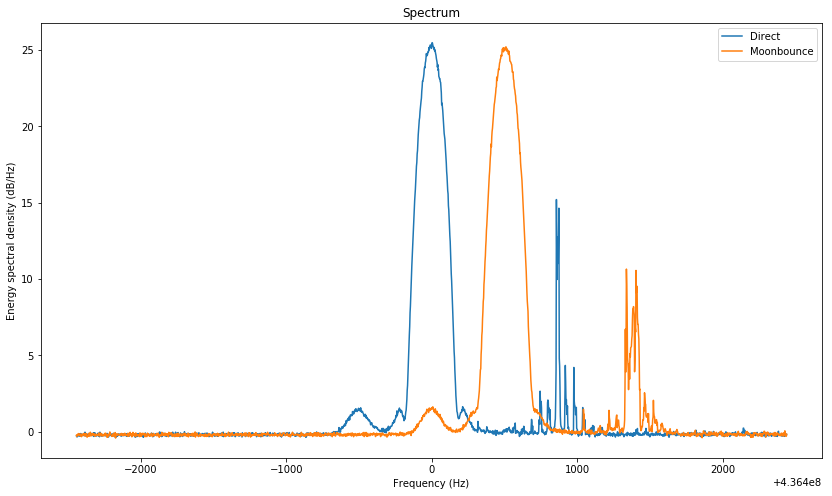

In [4]:
plt.figure(figsize=(14,8),facecolor='w')
freqsel = slice(spectrum.coords['freq'].size//2-1000,spectrum.coords['freq'].size//2+1000)
(10*np.log10(spectrum['spectrum_direct'][freqsel])).plot()
(10*np.log10(spectrum['spectrum_moonbounce'][freqsel])).plot()
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy spectral density (dB/Hz)')
plt.legend(['Direct', 'Moonbounce']);

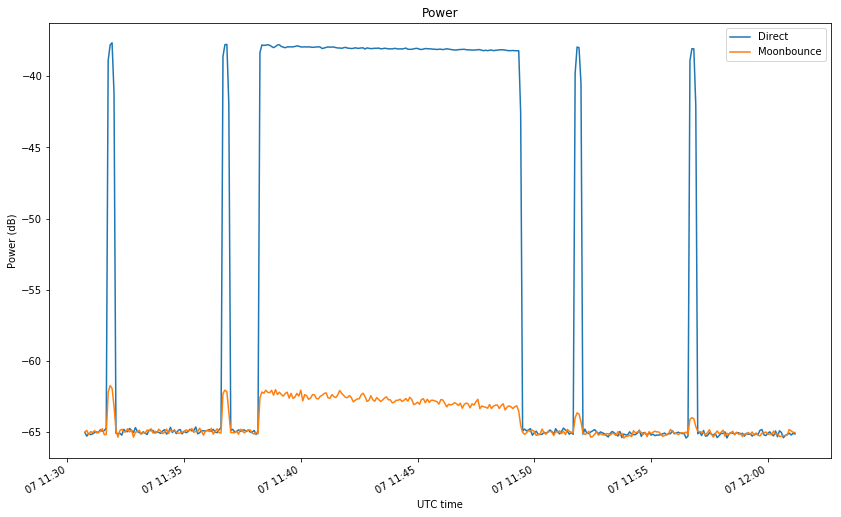

In [5]:
plt.figure(figsize=(14,8),facecolor='w')
resampling = '5S'
(10*np.log10(power['power_direct'].resample(time = resampling).mean())).plot()
(10*np.log10(power['power_moonbounce'].resample(time = resampling).mean())).plot()
plt.title('Power')
plt.xlabel('UTC time')
plt.ylabel('Power (dB)')
plt.legend(['Direct', 'Moonbounce']);